In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
start=pd.read_csv('6_Linear Regression/dataset/50_Startups.csv')

In [5]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
start.shape

(50, 5)

# Multiple Linear Regression

## Many variables are used to check the prediction of the dependant variable

In [7]:
start.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

# Encoding Catagorical Data

In [9]:
data_new=start.iloc[:,:-1]    #taking all the independant variables in one data set

In [10]:
data_new.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


# In machine learning no data is put into string So we have to change all the string data in numeric form

In [11]:
col=data_new.columns.tolist()

In [12]:
col

['R&D Spend', 'Administration', 'Marketing Spend', 'State']

In [13]:
data2=pd.get_dummies(data_new[col])
#get_dummies:to create dummy variables

#There are two ways for handling catagorical data:
#    1-Label Encoding  -> Numbers will be assigned from 0(like new york-0,california-1,florida-2)
#    2-One Hot Encoding->3 new columns will be made that is(3 new columns for 3 states and 1 and 0 will be assigned for true or false)

    
#The data wich has a mathematical order Label encodeing will be selected(eg- shirt sizes- small medium large)
#And other than that One hot encoding will be done

In [14]:
data2.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [17]:
data2.shape

(50, 6)

# Split Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=data2.loc[:,:].values
type(x)

numpy.ndarray

In [21]:
y=start.iloc[:,4].values

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=5,random_state=0)

In [24]:
x_train.shape

(45L, 6L)

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred=reg.predict(x_test)

In [31]:
y_test

array([ 103282.38,  144259.4 ,  146121.95,   77798.83,  191050.39])

In [28]:
y_pred

array([ 101475.55240111,  133287.417583  ,  132546.1614474 ,
         72702.7136192 ,  178346.51727008])

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.93480943710609976

In [32]:
import seaborn as sb

In [34]:
data_new['Profit']=start['Profit']

In [35]:
%matplotlib inline

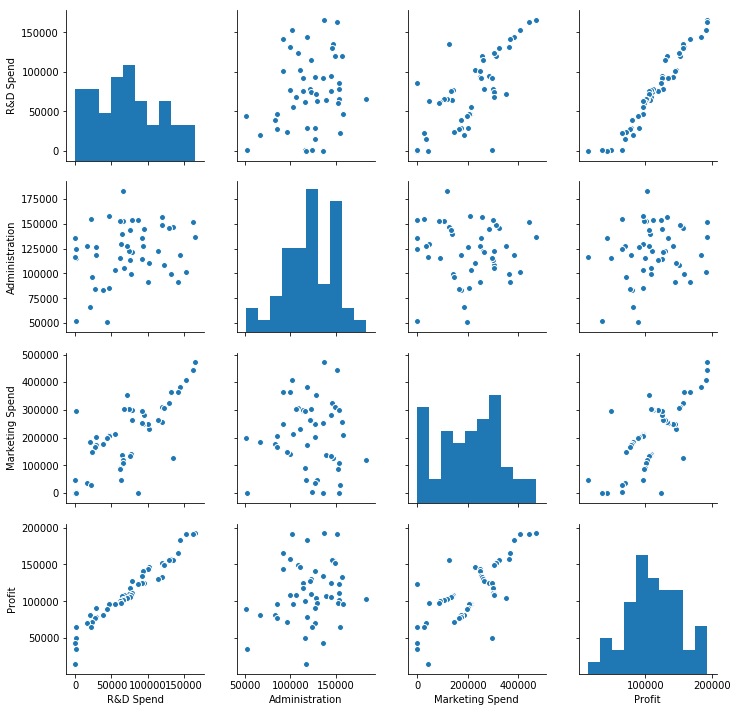

In [36]:
sb.pairplot(data_new)

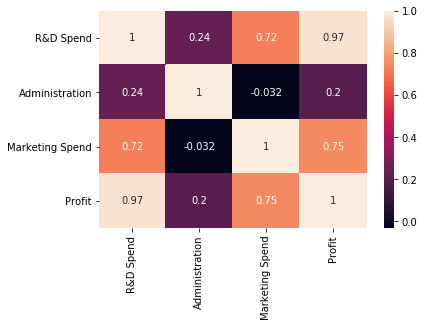

In [38]:
sb.heatmap(data_new.corr(),annot=True) #if annot not true then boxes will be empty without any values

In [39]:
data_new.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [40]:
data_new.iloc[:,[0,4]].head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


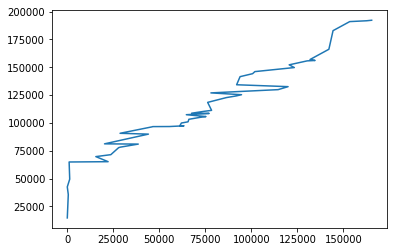

In [41]:
plt.plot(data_new['R&D Spend'].values,data_new['Profit'].values)

In [43]:
x_test[0]

array([  6.60515200e+04,   1.82645560e+05,   1.18148200e+05,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00])

In [44]:
reg.coef_

array([  7.78395354e-01,   5.70695437e-03,   3.21344322e-02,
         1.24850276e+02,  -1.02835632e+03,   9.03506043e+02])

In [45]:
reg.intercept_

46250.737220733601

In [46]:
t=x_test[0]

In [47]:
t

array([  6.60515200e+04,   1.82645560e+05,   1.18148200e+05,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00])

In [48]:
reg.intercept_+t[0]*reg.coef_[0]

97664.933523365282

In [49]:
y=reg.intercept_+t[0]*reg.coef_[0]+t[1]*reg.coef_[1]+t[2]*reg.coef_[2]+t[3]*reg.coef_[3]+t[4]*reg.coef_[4]+t[5]*reg.coef_[5]

In [50]:
y

101475.55240111002

In [54]:
a=[]
for t in x_test:
    a.append(reg.intercept_+t[0]*reg.coef_[0]+t[1]*reg.coef_[1]+t[2]*reg.coef_[2]+t[3]*reg.coef_[3]+t[4]*reg.coef_[4]+t[5]*reg.coef_[5])
print a   

[101475.55240111002, 133287.41758299526, 132546.16144739673, 72702.71361920482, 178346.51727007597]


In [57]:
from sklearn.datasets import load_boston

In [58]:
d=load_boston()
d.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [59]:
d.data.shape

(506L, 13L)

In [60]:
d.target.shape

(506L,)